<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.--Загрузка-и-подготовка-данных" data-toc-modified-id="Шаг-1.--Загрузка-и-подготовка-данных-1">Шаг 1.  Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Шаг-1.1.-Загрузка-и-обзор-данных." data-toc-modified-id="Шаг-1.1.-Загрузка-и-обзор-данных.-1.1">Шаг 1.1. Загрузка и обзор данных.</a></span></li><li><span><a href="#Шаг-1.2.-Подготовка--данных-для-исследования." data-toc-modified-id="Шаг-1.2.-Подготовка--данных-для-исследования.-1.2">Шаг 1.2. Подготовка  данных для исследования.</a></span></li></ul></li><li><span><a href="#Шаг-2.-Обучение-и-проверка-модели." data-toc-modified-id="Шаг-2.-Обучение-и-проверка-модели.-2">Шаг 2. Обучение и проверка модели.</a></span></li><li><span><a href="#Шаг-3.-Подготовка-к-расчёту-прибыли." data-toc-modified-id="Шаг-3.-Подготовка-к-расчёту-прибыли.-3">Шаг 3. Подготовка к расчёту прибыли.</a></span></li><li><span><a href="#Шаг-4.-Расчёт-прибыли-и-рисков." data-toc-modified-id="Шаг-4.-Расчёт-прибыли-и-рисков.-4">Шаг 4. Расчёт прибыли и рисков.</a></span></li><li><span><a href="#Шаг-5.-Итоги-исследования." data-toc-modified-id="Шаг-5.-Итоги-исследования.-5">Шаг 5. Итоги исследования.</a></span><ul class="toc-item"><li><span><a href="#Шаг-5.1.-Описание-хода-исследования." data-toc-modified-id="Шаг-5.1.-Описание-хода-исследования.-5.1">Шаг 5.1. Описание хода исследования.</a></span></li><li><span><a href="#Шаг-5.2.-Общий-вывод." data-toc-modified-id="Шаг-5.2.-Общий-вывод.-5.2">Шаг 5.2. Общий вывод.</a></span></li></ul></li></ul></div>

# Выбор локации для скважины

Мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Нужно построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой **Bootstrap.**

**Шаги для выбора локации:**

- В избранном регионе ищем месторождения, для каждого определяем значения признаков;

- Строим модель и оцениваем объём запасов;

- Выбираем месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;

- Прибыль равна суммарной прибыли отобранных месторождений.


**Описание данных:**

  - id — уникальный идентификатор скважины;
  - f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
  - product — объём запасов в скважине (тыс. баррелей).

**Условия задачи:** 

Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

## Шаг 1.  Загрузка и подготовка данных

### Шаг 1.1. Загрузка и обзор данных.

In [1]:
# импорт основных библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# импорт библиотек моделей и разделения выборок
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# импорт библиотек с метриками 
from sklearn.metrics import mean_squared_error
# импорт библиотек для работы со статистикой
from scipy import stats as st
from numpy.random import RandomState 

# импорт библиотеки для предупреждений
import warnings
warnings.filterwarnings('ignore')


Bad key text.latex.preview in file C:\Users\regki\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\regki\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\regki\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_qua

In [2]:
# чтение датасетов и запись их в переменные с применением метода try-except
try:
    df_1 = pd.read_csv('/Users/regki/Downloads/geo_data_0.csv')
    df_2 = pd.read_csv('/Users/regki/Downloads/geo_data_1.csv')
    df_3 = pd.read_csv('/Users/regki/Downloads/geo_data_2.csv')
except:
    df_1 = pd.read_csv('/datasets/geo_data_0.csv')
    df_2 = pd.read_csv('/datasets/geo_data_1.csv')
    df_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# вывод на экран датасета c 1 регионом
df_1

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
# обзор данных по 1 Региону
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
# вывод на экран датасета cо 2 регионом
df_2

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [6]:
# обзор данных по 2 Региону
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
# вывод на экран датасета c 3 регионом
df_3

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [8]:
# обзор данных по 3 Региону
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
# обзор экстремумов в значениях датасета 1
df_1[['f0', 'f1', 'f2', 'product']].describe().loc[['min', 'max']]

,f0,f1,f2,product
min,-1.408605,-0.848218,-12.088328,0.000000
max,2.362331,1.343769,16.003790,185.364347


In [10]:
# обзор экстремумов в значениях датасета 2
df_2[['f0', 'f1', 'f2', 'product']].describe().loc[['min', 'max']]

,f0,f1,f2,product
min,-31.609576,-26.358598,-0.018144,0.000000
max,29.421755,18.734063,5.019721,137.945408


In [11]:
# обзор экстремумов в значениях датасета 3
df_3[['f0', 'f1', 'f2', 'product']].describe().loc[['min', 'max']]

,f0,f1,f2,product
min,-8.760004,-7.084020,-11.970335,0.000000
max,7.238262,7.844801,16.739402,190.029838


Для исследования даны три датасета одной размерности в 100 тысяч строк и 5 столбцов. 4 столбца с признаками и целевым признаком включают данные в вещественном типе, а столбец с идентификатором скважины - в строковом. Данные с целевым признаком выражены в положительных числах, а признаки включают как положительные, так и отрицательные значения. Мы не можем сказать что конкретно обозначают эти признаки. Возможно они отмасштабированные численные или какие-либо из них перекодированные и масштабированные категориальные признаки. Поэтому будем острожны с их редактированием и удалением, но все же далее изучим данные на наличие выбросов и распределение в данных, а также проверим их на дубликаты.

### Шаг 1.2. Подготовка  данных для исследования.

In [12]:
# создание списка с датафреймами и номерами регионов
list_df = [df_1, df_2, df_3]
list_df_id = [df_1['id'], df_2['id'], df_3['id']]
list_numb_sample = ['1', '2', '3']

In [13]:
# проверка данных на дубликаты
for i in range(len(list_df)):
    print(f'Количество дубликатов в таблице №{i}: {list_df[i].duplicated().sum()} шт.')

Количество дубликатов в таблице №0: 0 шт.
Количество дубликатов в таблице №1: 0 шт.
Количество дубликатов в таблице №2: 0 шт.


In [14]:
# проверка дубликатов в идентификаторах скважин
for i in range(len(list_df)):
    print(f'Количество дубликатов в идентификаторах скважин по таблице №{i}: {list_df_id[i].duplicated().sum()} шт.')

Количество дубликатов в идентификаторах скважин по таблице №0: 10 шт.
Количество дубликатов в идентификаторах скважин по таблице №1: 4 шт.
Количество дубликатов в идентификаторах скважин по таблице №2: 4 шт.


Явные дубликаты во всех таблицах отсутствуют. При проверке повторов в идентификаторах скважин выявили до 10 в датасетах. Так как количество дубликатов идентификаторов очень незначительно, то их можно как удалять, так и опустить факт их наличия, так как это не может существенно повлиять на исследование.

Изучим данные на выбросы, которые могут привести к неправильному обучению модели.

In [15]:
# создание функции принимающей аргументами данные и номер региона, которая строит "боксплоты"
def boxplot(df, sample) :
    sns.set_style('whitegrid')
    sns.axes_style('white')
    plt.figure(figsize=(6,4))
    sns.boxplot(data = df)
    plt.title('Ящик с усами по признакам Региона {}'.format(sample), fontsize=12)

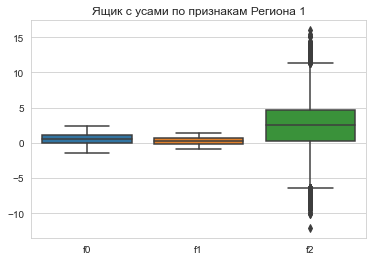

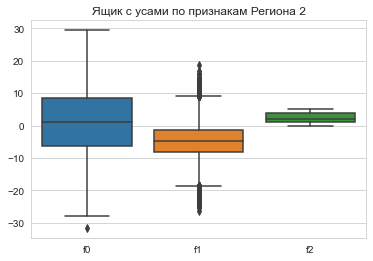

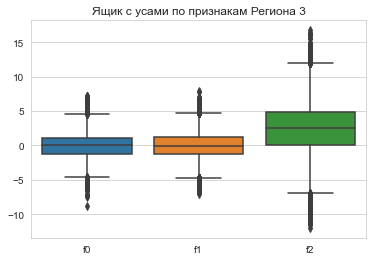

In [16]:
# вызов функции для "боксплотов" по признакам
for i in range(3):
    boxplot(list_df[i].drop('product', axis=1), list_numb_sample[i])

В данных по признакам в датафреймах есть значения, которые выходят за пределы полуторного интерквантильного размаха, но вцелом разброс имеет сплошной характер, без сильно выделяющихся значений. Выведем на экран долю значений, выходящих за пределы размаха. Предварительно запишем каждый столбец с данными значениями в переменные. 

In [17]:
# вывод на экран доли значений выходящих за 1.5 iqr по 1 датасету
df_1_iqr_f1 = df_1[(df_1['f2'] < (-6)) | (df_1['f2'] > 11)]['f2']
print('Доля значений выходящих за пределы 1.5 iqr "f2" в 0 датасете: {:.2%}'.format(df_1_iqr_f1.count() / 
                                                                                    len(df_1)))

Доля значений выходящих за пределы 1.5 iqr "f2" в 0 датасете: 0.75%


In [18]:
# вывод на экран доли значений выходящих за 1.5 iqr по 2 датасету
df_2_iqr_f0  = df_2[(df_2['f0'] < (-30))]['f0']
df_2_iqr_f1 = df_2[(df_2['f1'] < (-20)) | (df_2['f1'] > 10)]['f1']
print('Доля значений выходящих за пределы 1.5 iqr "f0" во 2 датасете: {:.2%}'.format(df_2_iqr_f0.count() /
                                                                                     len(df_2)))
print('Доля значений выходящих за пределы 1.5 iqr "f1" во 2 датасете: {:.2%}'.format(df_2_iqr_f1.count() /
                                                                                     len(df_2)))

Доля значений выходящих за пределы 1.5 iqr "f0" во 2 датасете: 0.00%
Доля значений выходящих за пределы 1.5 iqr "f1" во 2 датасете: 0.33%


In [19]:
# вывод на экран доли значений выходящих за 1.5 iqr по 3 датасету
df_3_iqr_f0 = df_3[(df_3['f0'] < (-5)) | (df_3['f0'] > 5)]['f0']
df_3_iqr_f1 = df_3[(df_3['f1'] < (-5)) | (df_3['f1'] > 5)]['f1']
df_3_iqr_f2 = df_3[(df_3['f2'] < (-7)) | (df_3['f2'] > 12)]['f2']
print('Доля значений выходящих за пределы 1.5 iqr "f0" во 2 датасете: {:.2%}'.format(df_3_iqr_f0.count() / 
                                                                                     len(df_3)))
print('Доля значений выходящих за пределы 1.5 iqr "f1" во 2 датасете: {:.2%}'.format(df_3_iqr_f1.count() /
                                                                                     len(df_3)))
print('Доля значений выходящих за пределы 1.5 iqr "f2" во 2 датасете: {:.2%}'.format(df_3_iqr_f2.count() /
                                                                                     len(df_3)))

Доля значений выходящих за пределы 1.5 iqr "f0" во 2 датасете: 0.38%
Доля значений выходящих за пределы 1.5 iqr "f1" во 2 датасете: 0.39%
Доля значений выходящих за пределы 1.5 iqr "f2" во 2 датасете: 0.57%


Также изучим целевой признак на выбросы.

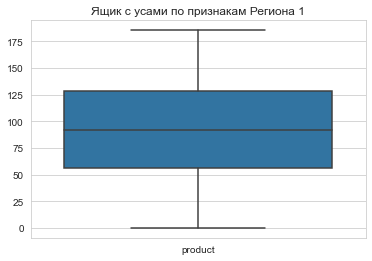

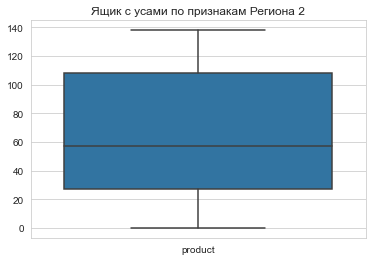

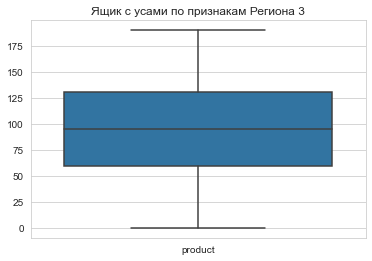

In [20]:
# вызов функции для "боксплотов" по целевому признаку
for i in range(3):
    boxplot(list_df[i].drop(['f0', 'f1', 'f2'], axis=1), list_numb_sample[i])

Построим гистограммы, чтобы проанализировать распределение целевого признака.

In [21]:
# создание функции принимающей аргументами целевой признак и номер региона, которая строит гистограммы
def target_hist(target, sample):
    sns.set_style('whitegrid')
    sns.axes_style('white')
    plt.figure(figsize=(8,6))
    sns.histplot(data=target)
    plt.title('Распределение объма добычи Региона {}'.format(sample, fontsize=14))
    plt.ylabel('Объем, тыс. баррелей', fontsize=12)

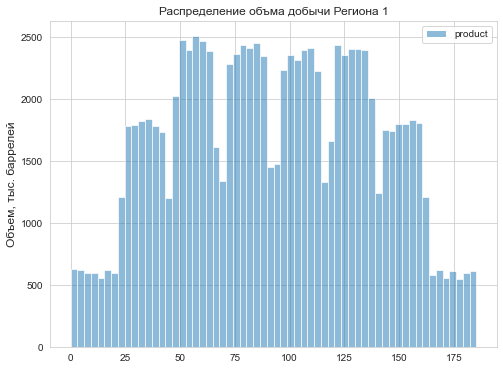

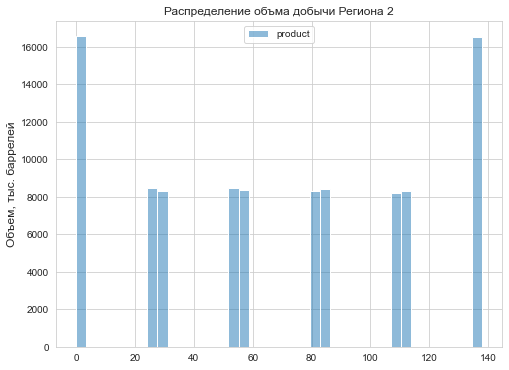

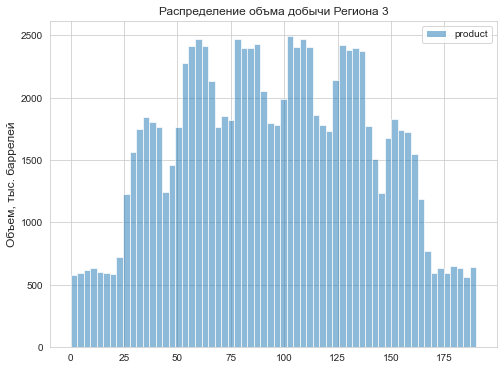

In [22]:
# вызов функции для постройки гистограмм
for i in range(3):
    target_hist(list_df[i].drop(['f0', 'f1', 'f2'], axis=1), list_numb_sample[i])

Распределение целевого признака в 1 и 3 регионах очень похоже, по форме близкое к нормальному, но с некоторыми просадками в частоте значений в середине. Скорее всего обучение и показатели модели на этих датасетах может быть близким. Распределение объема добычи во 2 датасете не имеет нормальный вид, в середине узкие диапазоны с примерно одинаковой частотой в данных и много  данных по краям шкалы на минимальной и максимальных запасах сырья. Результаты обучения модели на 2 датасете скорее всего будут сильно отличаться от 1 и 3. 

## Шаг 2. Обучение и проверка модели.

In [23]:
# создание функции для деления данных на признаки и целевой признак
def split_feat_targ(df):
    X, y = df.drop(['id', 'product'], axis=1), df['product']
    return X, y

In [24]:
# вызов функции для деления на признаки
X_1, y_1 = split_feat_targ(df_1)
X_2, y_2 = split_feat_targ(df_2)
X_3, y_3 = split_feat_targ(df_3)

In [25]:
# создание списков с признаками и целевым признаком
list_feature = [X_1, X_2, X_3,]
list_target = [y_1, y_2, y_3]

In [26]:
# создание функции, принимающей аргументами признаки и целевой признак для разбиения данных на тренировочную и валидационную
# выборки
def train_valid_split(features, target):
    features_train, features_valid, target_train, target_valid = train_test_split(features, target,
                                                                                  test_size=0.25, random_state=12345)
    return features_train, features_valid, target_train, target_valid

In [27]:
# вызов функции для разбиения и запись в переменные по регионам
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_valid_split(X_1, y_1)
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_valid_split(X_2, y_2)
X_train_3, X_valid_3, y_train_3, y_valid_3 = train_valid_split(X_3, y_3)

In [28]:
# создание списков с выборками 
list_features_train = [X_train_1, X_train_2, X_train_3]
list_target_train = [y_train_1, y_train_2, y_train_3]
list_features_valid = [X_valid_1, X_valid_2, X_valid_3]
list_target_valid = [y_valid_1, y_valid_2, y_valid_3]

In [29]:
# создание функции, принимающей аргументами тренировочные, валидационные выборки и номер региона для вывода на экран размера
# выборок
def samp_size(X_t, y_t, X_v, y_v, name_samp):
    for i in range(3):
        print( f'Размер тренировочной выборки по Региону {name_samp[i]}: {X_t[i].shape}, {y_t[i].shape}.'
               f'Размер валидационной выборки по Региону {name_samp[i]}:{X_v[i].shape}, {y_v[i].shape}.')
        print()

In [30]:
# вызов функции для вывода на экран размера выборок
samp_size(list_features_train, list_target_train, list_features_valid, list_target_valid, list_numb_sample)

Размер тренировочной выборки по Региону 1: (75000, 3), (75000,).Размер валидационной выборки по Региону 1:(25000, 3), (25000,).

Размер тренировочной выборки по Региону 2: (75000, 3), (75000,).Размер валидационной выборки по Региону 2:(25000, 3), (25000,).

Размер тренировочной выборки по Региону 3: (75000, 3), (75000,).Размер валидационной выборки по Региону 3:(25000, 3), (25000,).



Создадим функцию, которая принимает аргументами тренировочные и валидационные выборки по всем регионам, а также номера регионов. Внутри модель "LinearRegression" обучается, делает предсказания, в валидационной выборке с признаками создается новый столбец с данными о предсказании целевого признака. Рассчитывается и выводится на экран метрика RMSE, а также средний запас предсказанного сырья в регионе.

In [31]:
# создание функции для обучения и предсказания модели, рассчета RMSE и среднего предсказанного запаса сырья по каждому региону
def fit_predict_model(X_t, y_t, X_v, y_v, numb_samp): 
    for i in range(3):
        reg = LinearRegression().fit(X_t[i], y_t[i])
        predicted_valid = reg.predict(X_v[i])
        X_v[i]['predicted'] = predicted_valid
        RMSE = (mean_squared_error(y_v[i], predicted_valid))**0.5
        print('RMSE модели на валидационной выборке Региона {}: {:.3f}'.format(numb_samp[i], RMSE))
        print()
        print('Средний запас предсказанного сырья Региона {}: {:.3f} тыс. баррелей'.format(numb_samp[i],
                                                                                           predicted_valid.mean()))
        print('\n')

In [32]:
fit_predict_model(list_features_train, list_target_train, list_features_valid, list_target_valid, list_numb_sample)

RMSE модели на валидационной выборке Региона 1: 37.579

Средний запас предсказанного сырья Региона 1: 92.593 тыс. баррелей


RMSE модели на валидационной выборке Региона 2: 0.893

Средний запас предсказанного сырья Региона 2: 68.729 тыс. баррелей


RMSE модели на валидационной выборке Региона 3: 40.030

Средний запас предсказанного сырья Региона 3: 94.965 тыс. баррелей




 - Как и предполагали при похожем распределении данных, модель показала примерно одинаковые RMSE на 1 и 3 регионах, но ошибка при этом достаточно велика. Средний запас сырья для скважины в этих регионах тоже почти равен.
 - Величина RMSE модели на 2 регионе очень низкая, что можно объяснить абсолютно иным распределением данных в этом регионе относительно других регионов. Средний запас предсказанного сырья в скважине 2 региона примерно на 25% ниже чем в 1 и 3 регионах.

## Шаг 3. Подготовка к расчёту прибыли.

In [33]:
# создание константы затрат на бурение скважин
BUDGET = 10000000000
# создание константы дохода с 1000 баррелей сырья
REVENUE_PER_1000_BARRELS = 450000
# создание константы вероятности получения убытка
P_LOSS = 0.025
# создание константы количества топ скважин
TOP_200 = 200
# создание константы количества скважин для исследования региона
CHOOSE_ID = 500
# создание константы уровня доверия(для доверительного интервала)
LEV_CONF= 0.95

In [34]:
# рассчет достаточного объема сырья для разработки одной скважины
enough_vol_per_id = BUDGET / (TOP_200 * REVENUE_PER_1000_BARRELS)
print('Достаточный объем сырья для разработки одной скважины: {:.3f} тыс. баррелей.'.format(enough_vol_per_id))

Достаточный объем сырья для разработки одной скважины: 111.111 тыс. баррелей.


 - Сравнив данные о предсказании моделью среднего запаса сырья в скважине по каждому региону и достаточный объем сырья по одной скважине для преодоления порога безубыточности, можно отметить, что средний предсказанный объем существенно ниже достаточного.
 - Распеределение данных неравномерно, поэтому выбрав лучшие 200 скважин наш алгоритм возможно предскажет скважины, обеспечивающие безубыточную разработку

## Шаг 4. Расчёт прибыли и рисков. 

Для решения задачи создадим функцию, которая принимает аргументами данные валидационной выборки региона и его номер. Функция находит индексы топ-200 скважин, предсказанных моделью, затем сохраняет значения реального целевого признака с этими индексами, суммирует объем сырья топ-200 скважин и находит доход и прибыль разработки этих скважин. Возвращает объем сырья и прибыль топ-200 скважин. 

In [35]:
# создание функции для рассчета объема сырья и прибыли топ-200 предсказанных скважин региона
def profit_samp(X_v, y_v, name_samp):
    y_predicted_max_index = X_v.nlargest(TOP_200, 'predicted', keep='first').index
    y_top_200 = y_v.loc[y_predicted_max_index]
    y_top_200_product = y_top_200.sum()
    y_top_200_revenue = y_top_200_product*REVENUE_PER_1000_BARRELS
    y_top_200_profit = y_top_200_revenue - BUDGET
    return y_top_200_product, y_top_200_profit

In [36]:
# вывод на экран в цикле объема сырья и прибыли топ-200 предсказанных скважин с вызовом функции для рассчета объема сырья и
# прибыли
for i in range(3):
    product, profit = profit_samp(list_features_valid[i], list_target_valid[i], list_numb_sample[i])
    print('Объем сырья для топ-200 скважин Региона {}: {:_.0f} тысяч баррелей'.format(list_numb_sample[i], product))
    print() 
    print('Прибыль для топ-200 скважин Региона {} составляет {:_.0f} рублей'.format(list_numb_sample[i], profit))
    print('\n')

Объем сырья для топ-200 скважин Региона 1: 29_602 тысяч баррелей

Прибыль для топ-200 скважин Региона 1 составляет 3_320_826_043 рублей


Объем сырья для топ-200 скважин Региона 2: 27_589 тысяч баррелей

Прибыль для топ-200 скважин Региона 2 составляет 2_415_086_697 рублей


Объем сырья для топ-200 скважин Региона 3: 28_245 тысяч баррелей

Прибыль для топ-200 скважин Региона 3 составляет 2_710_349_964 рублей




 - Топ-200 предсказанных скважин для Региона 1 показали наилучший объем сырья и прибыль.
 - Предсказанные скважины для 2 и 3 региона выдали примерно одинаковый объем сырья и прибыль.
 
Так как данные в выборке имеют неравномерное распределение, нахождение прибыли на общей выборке может иметь искаженный характер. Для оценки рисков и нахождения более объективной средней прибыли воспользуемся техникой "Bootstrap". 
 
 - В цикле для трех регионов рассчитаем 95-й% доверительный интервал средней прибыли, среднюю прибыль, а также вероятность получения убытка. 
 - Для нахождения средней прибыли по региону воспользуемся функцией для нахождения объема и прибыли топ-200 скважин. В функцию передаем выборку, сформированную методом "sample", в котором доля "frac" рассчитана как отношение выбираемых 500 скважин к длине валидационной выборки по региону.
 - Среднюю прибыль добавляем в список из которого находим среднее значение прибыли, а также 95-й% интервал прибыли.
 - Для нахождения вероятности получения убытка создаем счетчик, в котором сохраняем по условию количество убытков, полученных с применением техники "Bootstrap". Вероятность вычисляем поделив количество убытков на количество выборок. 

In [37]:
# Расcчет средней прибыли, доверительного интервала, риска убытка для Региона c с применением техники "Bootstrap"
for i in range(3):
    print('Расчет средней прибыли, доверительного интервала, риска убытка для Региона {}:'.format(list_numb_sample[i]))
    print()
    state = np.random.RandomState(12345)
    count = 0
    bootstrat_samp = 1000
    prof_loss_samp = []
    for _ in range(bootstrat_samp):
        X_pred_samp = list_features_valid[i].sample(frac=CHOOSE_ID/len(list_features_valid[i]),
                                                    replace=True, random_state=state)
        prod_samp, prof_samp = profit_samp(X_pred_samp, list_target_valid[i], list_numb_sample[i])
        prof_loss_samp.append(prof_samp)
        if prof_samp < 0:
            count += 1 
            
    prof_loss_samp = pd.Series(prof_loss_samp)
    prof_loss_samp_mean = prof_loss_samp.mean()
    confidence_interval = st.t.interval(LEV_CONF, len(prof_loss_samp) - 1, prof_loss_samp.mean(), prof_loss_samp.sem())
    lower = prof_loss_samp.quantile(0.05)
    upper = prof_loss_samp.quantile(0.90)
    print('5-% квантиль:', lower)
    print('90-% квантиль:', upper)
    print()
    print('95-й% доверительный интервал по Региону {}: {}'.format(list_numb_sample[i], confidence_interval))
    print()
    print('Средняя прибыль по Региону {}: {:_.0f} рублей'.format(list_numb_sample[i], prof_loss_samp_mean))
    print()
    prob_loss = count / bootstrat_samp
    print('Вероятность получения убытка в Регионе {}: {:.1%}'.format(list_numb_sample[i], prob_loss))
    print()
    if prob_loss < P_LOSS:
        print('Риск убытков по Региону {} ниже 2.5%'.format(list_numb_sample[i]))
    else:
        print('Риск убытков по Региону {} выше 2.5%'.format(list_numb_sample[i]))
    print('\n\n')     

Расчет средней прибыли, доверительного интервала, риска убытка для Региона 1:

5-% квантиль: -37181596.26254606
90-% квантиль: 746656397.4300469

95-й% доверительный интервал по Региону 1: (379620315.14797246, 412709654.4567696)

Средняя прибыль по Региону 1: 396_164_985 рублей

Вероятность получения убытка в Регионе 1: 6.9%

Риск убытков по Региону 1 выше 2.5%



Расчет средней прибыли, доверительного интервала, риска убытка для Региона 2:

5-% квантиль: 109475721.45480281
90-% квантиль: 723269894.9594278

95-й% доверительный интервал по Региону 2: (443147248.6639008, 468942962.90942127)

Средняя прибыль по Региону 2: 456_045_106 рублей

Вероятность получения убытка в Регионе 2: 1.5%

Риск убытков по Региону 2 ниже 2.5%



Расчет средней прибыли, доверительного интервала, риска убытка для Региона 3:

5-% квантиль: -58533441.0505024
90-% квантиль: 736849010.8628638

95-й% доверительный интервал по Региону 3: (387445797.47128093, 421361935.66543376)

Средняя прибыль по Региону 3: 404_40

**При использовании техники "Bootstrap":**
 
 - Регион 2:
   - Единственный, где с применением техники "Bootstrap" вероятность риска получения убытка при выборе скважин с использованием модели машинного обучения оказалась ниже 2.5 %. 
   - Неравномерное распределение запасов не позволяло при использовании общей выборки найти объективное распределение прибыли в предсказанных скважинах для этого региона.
   - Распределение прибыли в доверительном интервале имеет меньший диапазон и большие показатели чем других регионов.
 - В регионах 1 и 3:
   - Риск получить убыток намного выше чем во 2 регионе. 
   - Регион 1 имеет средние показатели прибыли и распределения этой прибыли в доверительном интервале.
   - Наивысший риск получения убытка существует в 3 регионе.
   
**Технику "Bootstrap" можно использовать для нахождения необходимых величин не рассчитывая на нормальное распределение в данных.  В задаче по выбору оптимального региона для бурения скважин она помогает находить наиболее объективное распределение прибыли. С учетом всех преимуществ данного метода и использовании модели машинного обучения "LinearRegression" делаем выбор в пользу разработки скважин во "2-м Регионе".**

## Шаг 5. Итоги исследования.

### Шаг 5.1. Описание хода исследования.

Для реализации поставленной задачи мы:
   - Изучили датасет, проверили экстремумы в признаках.
   - Проверили данные на дубликаты.
   - Построили "боксплоты", на основании их проверили долю выбросов по каждому региону и удалили их.
   - Построили гистограммы распределения целевого признака, отметили существенные отличия распределения 2 региона от 1 и 3.
   - Разбили данные на признаки и целевой признак, затем создали обучающие и валидационные выборки по регионам.
   - Указали размерность выборок.
   - Обучили модель "LinearRegression" на тренировочных выборках, которой сделали предсказания на валидационных выборках.
   - Рассчитали RMSE и средний запас сырья в скважине регионов, указали на разницу показателей 2 региона и других.
   - Создали необходимые константы для последующих расчетов объема сырья, прибыли, риска убытков для разработки топ-скважин.
   - Рассчитали достаточный объем сырья для безубыточной разработки скважины.
   - Создали функцию для рассчета прибыли топ-скважин и с ее помощью вывели на экран прибыль и объем сырья топ-скважин.
   - Техникой "Bootstrap" с 1000 подвыборок вычислили распределение прибыли, 95-й% доверительный интервал и вероятность убытка в каждом регионе.
   - На основании исследования сделали выбор региона для бурения.
По итогам исследования делаем общий вывод:

### Шаг 5.2. Общий вывод.

 - Точность предсказания модели "LinearRegression" на данных исследования оказалась лучше на выборке далекой от нормального распределения данных.
 - При прогнозировании топ-200 скважин на общих валидационных выборках по регионам с нормальным распределением данных, показатели прибыли и запасов сырья лучше, чем у региона с несбалансированным распределением данных.
 - Используя технику "Bootstrap", которуя позволяет посчитать распределение прибыли на данных с далеким от нормы распределением, получили лучшие результаты для Региона 2. 
 - На основании преимуществ использования техники "Bootstrap", рекомендуем производить разработку скважин во 2-м Регионе.